In [4]:
import pandas as pd
import numpy as np
#csv so I can read in my 2 csv file
import csv
#matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
#cv so models can be tested for overfitting
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.cross_validation import cross_val_score

#knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#create a dt model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#for bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [5]:
movieData=pd.read_csv('movieData.csv')

In [6]:
movieDataLow=pd.read_csv('movieDataLow.csv')

In [7]:
movieDataLow.tail(1)


,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
84,84,"Bo Derek, Anthony Quinn, Don Murray, Julie Newmar",4 wins & 6 nominations.,USA,John Derek,"Comedy, Crime, Fantasy",English,NaN,Elderly Scott kills himself after a heart atta...,99,...,01 Jun 1990,True,90 min,Ghosts Can't Do It,movie,John Derek (by),1989,tt0099656,2.3,"1,964"


In [8]:
movieDataAll= pd.concat([movieData, movieDataLow], ignore_index=True)

In [9]:
movieDataAll.tail(1)

,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
327,84,"Bo Derek, Anthony Quinn, Don Murray, Julie Newmar",4 wins & 6 nominations.,USA,John Derek,"Comedy, Crime, Fantasy",English,NaN,Elderly Scott kills himself after a heart atta...,99,...,01 Jun 1990,True,90 min,Ghosts Can't Do It,movie,John Derek (by),1989,tt0099656,2.3,"1,964"


In [10]:
#tempGenreD['']

In [11]:
movieDataAll.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes'],
      dtype='object')

In [12]:
movieDataEdited=movieDataAll.copy()

In [13]:
movieDataEdited.tail(1)

,Unnamed: 0,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ranking,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
327,84,"Bo Derek, Anthony Quinn, Don Murray, Julie Newmar",4 wins & 6 nominations.,USA,John Derek,"Comedy, Crime, Fantasy",English,NaN,Elderly Scott kills himself after a heart atta...,99,...,01 Jun 1990,True,90 min,Ghosts Can't Do It,movie,John Derek (by),1989,tt0099656,2.3,"1,964"


imdbRating = float
imdbVotes = object - need to convert to integer

1 missing
Language
imdbRating
imdbVotes

2 missing from rating, runtime 
metascore missing 80
plot missing 3
rating 4

In [14]:
tColumms = []
i=0
for labels in movieDataEdited.columns:  
    if i >=0:
        tColumms.append(labels)
        i = i+1
    else:
        i=i+1

for item in tColumms:
    print 'For %s' %item
    print movieDataEdited[item].isnull().sum()
    print movieDataEdited[item].describe()
    print ' '

For Unnamed: 0
0
count    328.000000
mean     100.527439
std       70.816638
min        0.000000
25%       40.750000
50%       81.500000
75%      160.250000
max      242.000000
Name: Unnamed: 0, dtype: float64
 
For Actors
0
count                                                   328
unique                                                  327
top       Mark Hamill, Harrison Ford, Carrie Fisher, Bil...
freq                                                      2
Name: Actors, dtype: object
 
For Awards
54
count        274
unique       244
top       1 win.
freq           8
Name: Awards, dtype: object
 
For Country
0
count     328
unique     67
top       USA
freq      176
Name: Country, dtype: object
 
For Director
0
count                   328
unique                  232
top       Christopher Nolan
freq                      7
Name: Director, dtype: object
 
For Genre
0
count       328
unique      143
top       Drama
freq         22
Name: Genre, dtype: object
 
For Language
1
count        

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [15]:

# movieDataEdited['imdbVotes'] = movieDataEdited['imdbVotes'].convert_objects(convert_numeric=True)b

In [16]:
#one imdbVotes missing
#strip the comma out of the number
#movieDataEdited['imdbVotes'] = movieDataEdited['imdbVotes'].str.strip(',)
movieDataEdited['imdbVotes']=movieDataEdited['imdbVotes'].str.replace(',','')
movieDataEdited['imdbVotes'].fillna(0, inplace=True)
movieDataEdited['imdbVotes']=movieDataEdited['imdbVotes'].astype(int)
#movieDataEdited['imdbVotes']

In [17]:
#two run times missing

movieDataEdited['Runtime']=movieDataEdited['Runtime'].str.replace(' min','')
movieDataEdited['Runtime'].fillna(0, inplace=True)
movieDataEdited['Runtime']=movieDataEdited['Runtime'].astype(int)

In [18]:
#drop the one record with imdbRating missing
print movieDataEdited.shape
movieDataEdited = movieDataEdited.dropna(subset=['imdbRating'])
print movieDataEdited.shape

(328, 21)
(327, 21)


In [19]:
movieDataEdited['Runtime'].head()

0    142
1    175
2    202
3    152
4     96
Name: Runtime, dtype: int64

In [20]:
tempDF=movieDataEdited['Genre'].str[0:].str.split(',', expand=True )
tempDF.columns

RangeIndex(start=0, stop=3, step=1)

In [21]:
pd.melt?

In [22]:
pd.get_dummies?

In [25]:
tempGenre=pd.get_dummies(tempDF)


In [26]:
tempGenre.columns

Index([u'0_Action', u'0_Adventure', u'0_Animation', u'0_Biography',
       u'0_Comedy', u'0_Crime', u'0_Drama', u'0_Fantasy', u'0_Film-Noir',
       u'0_Horror', u'0_Mystery', u'0_Sci-Fi', u'0_Western', u'1_ Action',
       u'1_ Adventure', u'1_ Biography', u'1_ Comedy', u'1_ Crime',
       u'1_ Drama', u'1_ Family', u'1_ Fantasy', u'1_ Film-Noir',
       u'1_ History', u'1_ Horror', u'1_ Music', u'1_ Musical', u'1_ Mystery',
       u'1_ Romance', u'1_ Sci-Fi', u'1_ Sport', u'1_ Thriller', u'1_ War',
       u'1_ Western', u'2_ Adventure', u'2_ Comedy', u'2_ Crime', u'2_ Drama',
       u'2_ Family', u'2_ Fantasy', u'2_ Film-Noir', u'2_ History',
       u'2_ Horror', u'2_ Music', u'2_ Musical', u'2_ Mystery', u'2_ Romance',
       u'2_ Sci-Fi', u'2_ Sport', u'2_ Thriller', u'2_ War', u'2_ Western'],
      dtype='object')

In [27]:
tempGenre.shape

(327, 51)

In [28]:
tempGenre['gAction']=tempGenre['0_Action'] + tempGenre['1_ Action'] 

tempGenre['gAdventure']=tempGenre['0_Adventure'] + tempGenre['1_ Adventure']+tempGenre['2_ Adventure']

tempGenre['gAnimation']=tempGenre['0_Animation'] 

tempGenre['gBiography']=tempGenre['0_Biography'] + tempGenre['1_ Biography']

tempGenre['gComedy']=tempGenre['0_Comedy']+tempGenre['1_ Comedy'] + tempGenre['2_ Comedy']



tempGenre['gCrime']=tempGenre['0_Crime']+tempGenre['1_ Crime'] + tempGenre['2_ Crime']

tempGenre['gDrama']=tempGenre['0_Drama']+tempGenre['1_ Drama'] + tempGenre['2_ Drama']

tempGenre['gFamily']=tempGenre['1_ Family'] + tempGenre['2_ Family']

tempGenre['gFantasy']=tempGenre['0_Fantasy']+tempGenre['1_ Fantasy'] + tempGenre['2_ Fantasy']

tempGenre['gFilmNoir']=tempGenre['0_Film-Noir']+tempGenre['1_ Film-Noir'] + tempGenre['2_ Film-Noir']
tempGenre['gHistory']=tempGenre['1_ History'] + tempGenre['2_ History']

tempGenre['gHorror']=tempGenre['0_Horror']+tempGenre['1_ Horror'] + tempGenre['2_ Horror']
tempGenre['gMusic']=tempGenre['1_ Music'] + tempGenre['2_ Music']

tempGenre['gMusical']=tempGenre['1_ Musical'] + tempGenre['2_ Musical']

tempGenre['Mystery']=tempGenre['0_Mystery'] + tempGenre['1_ Mystery']+ tempGenre['2_ Mystery']

tempGenre['gRomance']=tempGenre['1_ Romance'] + tempGenre['2_ Romance']

tempGenre['gSciFi']=tempGenre['0_Sci-Fi']+tempGenre['1_ Sci-Fi'] + tempGenre['2_ Sci-Fi']

tempGenre['gSport']=tempGenre['1_ Sport'] + tempGenre['2_ Sport']
tempGenre['gThiller']=tempGenre['1_ Thriller'] + tempGenre['2_ Thriller']

tempGenre['gWar']=tempGenre['1_ War'] + tempGenre['2_ War']
tempGenre['gWestern']=tempGenre['0_Western'] + tempGenre['1_ Western'] + tempGenre['2_ Western']






In [29]:
tempGenre=tempGenre[['gAction','gAdventure','gAnimation','gComedy','gBiography',
                     'gCrime','gDrama','gFamily','gFantasy','gFilmNoir','gHistory',
                     'gHorror','gMusic','gMusical','Mystery',
                     'gRomance','gSciFi','gSport','gThiller','gWar','gWestern']]


In [30]:
#did the code below to for checking it did add correctly
# gColumms = []
# i=0
# for labels in tempGenre.columns:  
#     if i >=0:
#         gColumms.append(labels)
#         i = i+1
#     else:
#         i=i+1
# for item in gColumms:
#     print 'For %s' %item
#     print tempGenre[item].sum()
#     print ' '

In [31]:
tempGenre.head(1)

,gAction,gAdventure,gAnimation,gComedy,gBiography,gCrime,gDrama,gFamily,gFantasy,gFilmNoir,...,gHorror,gMusic,gMusical,Mystery,gRomance,gSciFi,gSport,gThiller,gWar,gWestern
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
movieDataEdited.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes'],
      dtype='object')

In [33]:

movieDataEdited=pd.DataFrame(movieDataEdited).join(pd.DataFrame(tempGenre))

In [34]:
movieDataEdited.shape


(327, 42)

In [35]:
movieDataEdited.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes', u'gAction', u'gAdventure',
       u'gAnimation', u'gComedy', u'gBiography', u'gCrime', u'gDrama',
       u'gFamily', u'gFantasy', u'gFilmNoir', u'gHistory', u'gHorror',
       u'gMusic', u'gMusical', u'Mystery', u'gRomance', u'gSciFi', u'gSport',
       u'gThiller', u'gWar', u'gWestern'],
      dtype='object')

In [36]:
#movieDataEdited['Rated']=movieDataEdited['Rated']
movieDataEdited['Rated'].fillna('Unknown', inplace=True)
#movieDataEdited['Rated'] = titanic['Rated'].apply(lambda x: 1 if x =='Missing' else 0)

In [37]:
movieDataEdited['Rated'].describe()

count     327
unique     12
top         R
freq      120
Name: Rated, dtype: object

In [38]:
#now to add dummies for 'Rated'. I first need to fillin withe word unknown for unknows
#new dataframe to hold dummies 

In [39]:

dummiedRated=pd.get_dummies(movieDataEdited['Rated'],prefix='Rated_')
dummiedRated.shape

(327, 12)

In [40]:
movieDataEdited=pd.DataFrame(movieDataEdited).join(pd.DataFrame(dummiedRated))

In [41]:
movieDataEdited.columns

Index([u'Unnamed: 0', u'Actors', u'Awards', u'Country', u'Director', u'Genre',
       u'Language', u'Metascore', u'Plot', u'Ranking', u'Rated', u'Released',
       u'Response', u'Runtime', u'Title', u'Type', u'Writer', u'Year',
       u'imdbID', u'imdbRating', u'imdbVotes', u'gAction', u'gAdventure',
       u'gAnimation', u'gComedy', u'gBiography', u'gCrime', u'gDrama',
       u'gFamily', u'gFantasy', u'gFilmNoir', u'gHistory', u'gHorror',
       u'gMusic', u'gMusical', u'Mystery', u'gRomance', u'gSciFi', u'gSport',
       u'gThiller', u'gWar', u'gWestern', u'Rated__APPROVED', u'Rated__G',
       u'Rated__M', u'Rated__NOT RATED', u'Rated__PASSED', u'Rated__PG',
       u'Rated__PG-13', u'Rated__R', u'Rated__TV-MA', u'Rated__TV-PG',
       u'Rated__UNRATED', u'Rated__Unknown'],
      dtype='object')

In [42]:

X=movieDataEdited[['Ranking','Runtime','Year',
                  'imdbVotes', 'gAction', 'gAdventure',
       'gAnimation', 'gComedy', 'gBiography', 'gCrime', 'gDrama',
       'gFamily', u'gFantasy', 'gFilmNoir', 'gHistory', 'gHorror',
       'gMusic', 'gMusical', 'Mystery', 'gRomance', 'gSciFi', 'gSport',
       'gThiller', 'gWar', 'gWestern','Rated__APPROVED', 'Rated__G',
       'Rated__M', 'Rated__NOT RATED', 'Rated__PASSED', 'Rated__PG',
       'Rated__PG-13', 'Rated__R', 'Rated__TV-MA', 'Rated__TV-PG',
       'Rated__UNRATED', 'Rated__Unknown']]

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
#Selected a rating or 8 or above to be indication of good or bad
le = LabelEncoder()
y = le.fit_transform(movieDataEdited['imdbRating'].apply(lambda x: 1 if x > 8.0 else 0))
#y=movieDataEdited['imdbRating'].apply(lambda x: 1 if x > 8.0 else 0)



In [45]:
#see if the word in the awards matter - I am only going to pick up the oscars


In [46]:

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=30, # Only use the top 50 most common words
)

In [47]:
wordsAward = v.fit_transform(movieDataEdited['Awards']).todense()  
wordsAward = pd.DataFrame(wordsJobTitle, columns=v.get_feature_names())

ValueError: np.nan is an invalid document, expected byte or unicode string.

# separating the file into train test
Test dataset will prove that the model can be used for data other than what it was fitted for

In [44]:
# now we have our X and y - lets create the TTS
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.4)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((196, 37), (131, 37), (196,), (131,))

# Model 1 knn  use to see if prediction can be made given
# the closest neighbors
after knn is done then will test it using CV

In [45]:
#knn on training set  starting with 5 of closest neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
print 'The knn score is ' + str(knn.score(x_train, y_train))

The knn score is 0.948979591837


In [50]:
#now runnng the model through CV 5 fold to check for overfitting.
#looks like we do have some overfitting.
scores=cross_val_score(knn, x_train, y_train,  cv=5, scoring ='accuracy')
print scores
print scores.mean()

[ 0.925       0.925       0.87179487  0.94871795  0.94736842]
0.923576248313


In [124]:
#confusion matrix
Y_pred = knn.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)

            Predicted High score  Low score
High score                    39         10
Low score                      0        147


In [126]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      0.80      0.89        49
          1       0.94      1.00      0.97       147

avg / total       0.95      0.95      0.95       196



# Decision Trees

In [72]:
dt = DecisionTreeClassifier(max_depth = 7, min_samples_split =2)
dt.fit(x_train, y_train)

#note I started with a depth of 3 and only votes and ranking was important. So I 
#increased the depth to 5 and then 7 and 9.  The last change did not add any more variables

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [78]:
print 'Decision tree score is ' + str(dt.score(x_train, y_train))

#pehaps this is a little overfitted

Decision tree score is 1.0


In [114]:
feature_importancesDT = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importancesDT.head()

,importance
imdbVotes,0.784932
Ranking,0.163669
gDrama,0.027211
Year,0.024187
Rated__NOT RATED,0.000000


In [79]:
#lets run model through cv  the result proves the DT was overfitted
scores=cross_val_score(dt, x_train, y_train,  cv=5, scoring ='accuracy')
print scores
print 'The mean for cv with dt is ' + str(scores.mean())


[ 0.925       0.975       0.84615385  0.94871795  0.94736842]
The mean for cv with dt is 0.928448043185


In [87]:
#setting up the parameters before we start
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)
def score(model, name):
    s = cross_val_score(model, x_train, y_train, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

In [106]:
# #lets run through bagging which is similar to cv
# bdt = BaggingClassifier(DecisionTreeClassifier())
# print score(bdt, "Bagging DT")
#the cv score is different from the bagging score - I wonder which is better
bagging = BaggingClassifier(dt, max_samples=0.5, max_features=0.5)
bagging.fit(x_train, y_train)
print cross_val_score(bagging, x_train, y_train, cv=5, n_jobs=-1).mean()

0.959487179487


In [127]:
#confusion matrix
Y_pred = dt.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)

            Predicted High score  Low score
High score                    49          0
Low score                      0        147


In [128]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00       147

avg / total       1.00      1.00      1.00       196



# Random Forest

In [110]:
#Random forest 
#random forest worked better
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf.fit(x_train, y_train)
print cross_val_score(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

0.959615384615


In [111]:
#graphing
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], 
                                       axis=0))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [112]:
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns

indices

array([ 3,  0,  1, 10,  2,  7,  6, 15, 36,  9,  4, 24, 31,  8, 12, 28,  5,
       30, 20, 23, 32, 16, 35, 25, 22, 17, 26, 11, 33, 34, 27, 13, 29, 14,
       19, 21, 18])

(-1, 37)

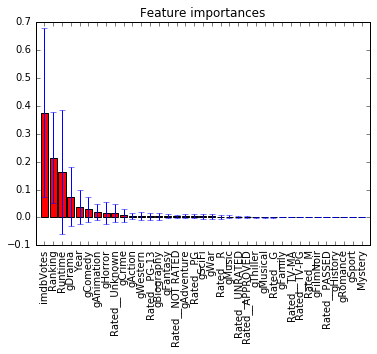

In [113]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

In [132]:
#confusion matrix
Y_pred = rf.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])

print(confusion)
#something is wrong with these numbers

            Predicted High score  Low score
High score                    49          0
Low score                      0        147


In [131]:
#Precision is tp/(tp + fp)  is the probabliy that some predicted to be high were not 

#recall = tp/(tp + fn)  that someone who predicted to be high was so

cls_rep = classification_report(y_train, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00       147

avg / total       1.00      1.00      1.00       196



# Extra Trees

In [136]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)
et.fit(x_train, y_train)
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X.columns
et.score(x_train, y_train)

1.0

(-1, 37)

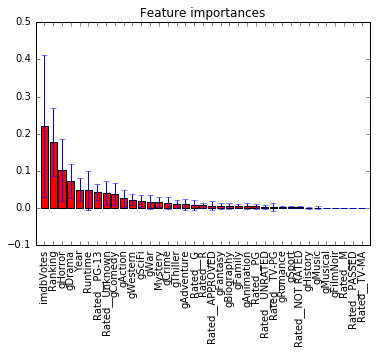

In [118]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

In [134]:
Y_pred = et.predict(x_train)
conmat = np.array(confusion_matrix(y_train, Y_pred))

confusion = pd.DataFrame(conmat, index=['High score', 'Low score'],
                         columns=['Predicted High score', 'Low score'])
print(confusion)

            Predicted High score  Low score
High score                    49          0
Low score                      0        147


# Finally running test data through the model

The models
Knn
Decision Trees
Random Forest
Extra Trees

In [140]:
#Knn

print 'The knn score is ' + str(knn.score(x_test, y_test))
scores=cross_val_score(knn, x_test, y_test,  cv=5, scoring ='accuracy')
print scores
print scores.mean()


The knn score is 0.908396946565
[ 0.96296296  0.92592593  0.76923077  0.88461538  0.92      ]
0.892547008547


In [141]:
#decision tree
dt.fit(x_test, y_test)
print 'Decision tree score is ' + str(dt.score(x_test, y_test))

Decision tree score is 1.0


In [142]:
bagging.fit(x_test, y_test)
print cross_val_score(bagging, x_test, y_test, cv=5, n_jobs=-1).mean()

0.930746438746


In [144]:
#random forest
rf.fit(x_test, y_test)
print cross_val_score(rf, x_test, y_test, cv=5, n_jobs=-1).mean()

0.938700854701


In [148]:
#Extra trees
et.fit(x_test, y_test)
print et.score(x_test, y_test)

1.0
